In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+06, tolerance: 4.775e+02
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.247e+06, tolerance: 4.768e+02
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e+06, tolerance: 4.778e+02
  model = cd_fast.enet_

{'alpha': 1e-05}
Column Names: ['generation biomass' 'generation fossil brown coal/lignite'
 'generation fossil gas' 'generation fossil hard coal'
 'generation fossil oil' 'generation hydro pumped storage consumption'
 'generation hydro run-of-river and poundage'
 'generation hydro water reservoir' 'generation nuclear'
 'generation other' 'generation other renewable' 'generation solar'
 'generation waste' 'generation wind onshore' 'forecast solar day ahead'
 'forecast wind onshore day ahead' 'total load forecast'
 'total load actual' 'total_renewable_generation']


c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+06, tolerance: 5.961e+02
  model = cd_fast.enet_coordinate_descent(


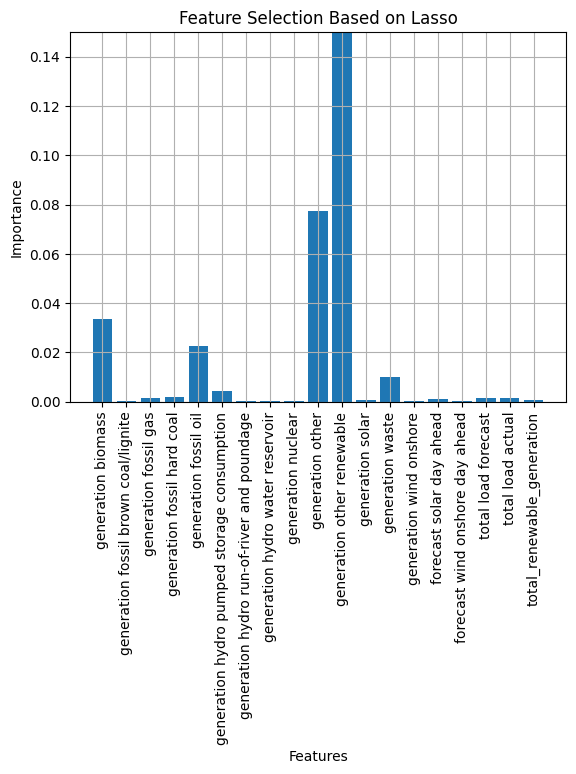

Feature Extraction: 
generation biomass
generation fossil oil
generation other
generation other renewable


In [85]:
data = pd.read_csv('data/preprocessed_energy_dataset.csv')

no_time_preprocessed_energy_df = data.drop(['time'], axis=1)
no_time_preprocessed_energy_df = no_time_preprocessed_energy_df.drop(['price day ahead'], axis=1) #drop cause of high correlations
X = no_time_preprocessed_energy_df.values # getting all values as a matrix of dataframe 

# Segregating the Feature and Target
X = no_time_preprocessed_energy_df.drop("price actual", axis=1).values
y = no_time_preprocessed_energy_df["price actual"].values

# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print(format(lasso_cv.best_params_))

names=no_time_preprocessed_energy_df.drop("price actual", axis=1).columns
print("Column Names: {}".format(names.values))

# calling the model with the best parameter
lasso1 = Lasso(alpha=0.001)
lasso1.fit(X, y)

# Using np.abs() to make coefficients positive.  
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns. 
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

#show in terminal the feature extracted
print("Feature Extraction: ")
for i in range(len(names)):
    if lasso1_coef[i] > 0.01:
        print(names[i])
